<a href="https://colab.research.google.com/github/Guneshwar24/ACIT4610-Evolutionary-Algo/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GENETIC ALGORITHM

Enter the number of queens (n):  8
Enter the initial placement of queens by column number separated by spaces (0-based indexing):
Enter the column numbers for queen 1: 0,1,2,3,4,5,6,7
Number of queens: 8
Initial queen placements: [0, 1, 2, 3, 4, 5, 6, 7]
Enter population size (default is 30): 
Enter tournament size (default is 5): 
Enter elite size (default is 4): 
Enter max generations (default is 2000): 
Enter mutation rate (default is 1): 
Enter crossover rate (default is 0.05): 
Generation 1: Best Fitness = 8
Solution found!
Solution Configuration:


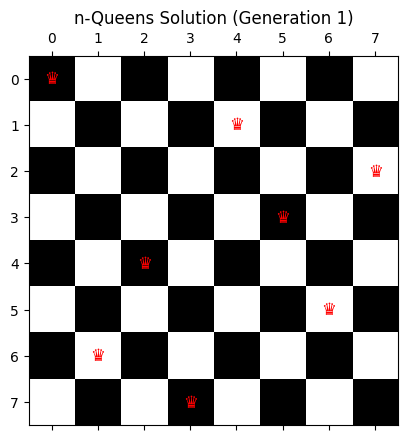

Solution as an array: [0, 4, 7, 5, 2, 6, 1, 3]


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def fitness(chromosome):
    clashes = 0
    n_queens = len(chromosome)
    for i in range(n_queens):
        for j in range(i + 1, n_queens):
            if abs(chromosome[i] - chromosome[j]) == j - i:
                clashes += 1
    return n_queens - clashes

def select_parents(population, tournament_size):
    parents = []
    for _ in range(2):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=fitness)
        parents.append(winner)
    return parents

def order_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [-1] * n

    child[start:end + 1] = parent1[start:end + 1]

    for i in range(n):
        if child[i] == -1:
            for gene in parent2:
                if gene not in child:
                    child[i] = gene
                    break

    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(chromosome)), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

def replace_population(population, offspring, elite_size):
    population.sort(key=fitness, reverse=True)
    next_population = population[:elite_size]
    next_population += offspring
    return next_population

def initialize_population(N, population_size):
    population = [random.sample(range(N), N) for _ in range(population_size)]
    return population

def get_user_input():
    while True:
        n_queens = int(input("Enter the number of queens (n):  "))
        if n_queens >= 4:
            break
        else:
            print("Please enter a value greater than or equal to 4.")

    initial_population = []

    print("Enter the initial placement of queens by column number separated by spaces (0-based indexing):")

    while len(initial_population) < n_queens:
        try:
            cols = input(f"Enter the column numbers for queen {len(initial_population) + 1}: ").strip().split(',')
            cols = list(map(int, cols))

            if len(cols) < n_queens - len(initial_population):
                print("Not enough column numbers provided. Please provide positions for all queens.")
                continue

            if any(cols.count(col) > 1 for col in cols):
                print("Only one queen is allowed per column. Please provide valid positions.")
                continue

            for col in cols:
                if 0 <= col < n_queens:
                    initial_population.append(col)
                else:
                    print(f"Invalid column number. Column number should be between 0 and {n_queens - 1}, and seperated by comma and space.")
        except ValueError:
            print("Invalid input. Please enter valid column numbers.")

    return n_queens, initial_population

def solution_as_array(queen_positions):
    return queen_positions

def plot_solution(solution, title="n-Queens Solution"):
    if solution is None:
        print("No solution found, so no plot will be generated.")
        return

    board_size = len(solution)
    chessboard = np.zeros((board_size, board_size), dtype=int)
    for i in range(board_size):
        for j in range(board_size):
            if (i + j) % 2 == 0:
                chessboard[i][j] = 1
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('binary', 2)
    ax.matshow(chessboard, cmap=cmap)
    queen = u'\u265B'  # Unicode character for queen
    for row, col in enumerate(solution):
        ax.text(col, row, queen, va='center', ha='center', color='red', fontsize=12)
    plt.title(title)
    plt.show()

def genetic_algorithm(N, population_size, mutation_rate, crossover_rate, tournament_size, elite_size, max_generations):
    population = initialize_population(N, population_size)
    for generation in range(max_generations):
        offspring = []
        while len(offspring) < population_size - elite_size:
            parents = select_parents(population, tournament_size)
            if random.random() < crossover_rate:
                child = order_crossover(parents[0], parents[1])
            else:
                child = parents[0][:]
            mutate(child, mutation_rate)
            offspring.append(child)
        population = replace_population(population, offspring, elite_size)
        best_fitness = fitness(max(population, key=fitness))
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")
        if best_fitness == N:
            print("Solution found!")
            solution = max(population, key=fitness)
            print("Solution Configuration:")
            plot_solution(solution, title=f"n-Queens Solution (Generation {generation + 1})")
            solution_array = solution_as_array(solution)
            print("Solution as an array:", solution_array)
            break

if __name__ == "__main__":
    n_queens, initial_positions = get_user_input()
    print("Number of queens:", n_queens)
    print("Initial queen placements:", initial_positions)

    population_size = int(input("Enter population size (default is 30): ") or 30)
    tournament_size = int(input("Enter tournament size (default is 5): ") or 5)
    elite_size = int(input("Enter elite size (default is 4): ") or 4)
    max_generations = int(input("Enter max generations (default is 2000): ") or 2000)
    mutation_rate = float(input("Enter mutation rate (default is 1): ") or 1)
    crossover_rate = float(input("Enter crossover rate (default is 0.05): ") or 0.05)

    genetic_algorithm(n_queens, population_size, mutation_rate, crossover_rate, tournament_size, elite_size, max_generations)